In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pycaret.classification import *

data = pd.read_csv("water_quality.csv")

# remove all the rows that contain null values
data = data.dropna()
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [ ]:
# Distribution of Unsafe and Safe Water
ax = sns.countplot(x = "Potability",data= data, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [8]:
# Standardize data
x_std = StandardScaler().fit_transform(data)
dt = pd.DataFrame(data=x_std)
dt.columns = list(data)
dt.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761,-0.822091
1,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033,-0.822091
2,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366,-0.822091
3,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163,-0.822091
4,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348,-0.822091


In [9]:
# Calculate covariance
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)
print('Covariance: \n',np.around(cov_mat,4))

Covariance: 
 [[ 1.0005  0.109  -0.0877 -0.0248  0.0105  0.0141  0.0284  0.0183 -0.0359
   0.0145]
 [ 0.109   1.0005 -0.0533 -0.0227 -0.1086  0.0117  0.0132 -0.0154 -0.0348
  -0.0015]
 [-0.0877 -0.0533  1.0005 -0.0518 -0.1629 -0.0052 -0.0055 -0.0157  0.0194
   0.0407]
 [-0.0248 -0.0227 -0.0518  1.0005  0.0063 -0.0283 -0.0238  0.015   0.0131
   0.0208]
 [ 0.0105 -0.1086 -0.1629  0.0063  1.0005 -0.0162  0.0268 -0.0234 -0.0099
  -0.0153]
 [ 0.0141  0.0117 -0.0052 -0.0283 -0.0162  1.0005  0.0157  0.0049  0.0125
  -0.0155]
 [ 0.0284  0.0132 -0.0055 -0.0238  0.0268  0.0157  1.0005 -0.0057 -0.0154
  -0.0156]
 [ 0.0183 -0.0154 -0.0157  0.015  -0.0234  0.0049 -0.0057  1.0005 -0.0205
   0.0092]
 [-0.0359 -0.0348  0.0194  0.0131 -0.0099  0.0125 -0.0154 -0.0205  1.0005
   0.0227]
 [ 0.0145 -0.0015  0.0407  0.0208 -0.0153 -0.0155 -0.0156  0.0092  0.0227
   1.0005]]


In [10]:
# Calculate eigenvalue and eigenvector
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues: \n', np.around(eig_vals,4))
print('Eigenvectors: \n', np.around(eig_vecs,4))

Eigenvalues: 
 [1.2131 1.1713 0.7643 0.8669 1.0596 0.9456 0.9682 0.9965 1.0136 1.0059]
Eigenvectors: 
 [[-0.4425 -0.4077 -0.0076 -0.7212 -0.1351  0.1352  0.1506  0.1847  0.1414
   0.0677]
 [-0.1936 -0.6332 -0.4497  0.4735 -0.1569  0.0558 -0.1231 -0.1849  0.1958
  -0.1404]
 [ 0.6625 -0.1471 -0.5892 -0.3478  0.1427 -0.0529 -0.0203  0.1625 -0.1212
  -0.0816]
 [-0.0537  0.2514 -0.1516 -0.231  -0.5697 -0.3234 -0.6134 -0.2177  0.0496
   0.0487]
 [-0.4697  0.5266 -0.6289  0.0636  0.147  -0.0346  0.2122  0.1756  0.0615
  -0.0079]
 [-0.0258 -0.1573 -0.0455 -0.0064  0.3517 -0.5059  0.0366 -0.2139  0.1435
   0.7247]
 [-0.1701 -0.0907  0.0708  0.0715  0.4264  0.0495 -0.6852  0.5442 -0.052
   0.0125]
 [-0.035  -0.0486 -0.1253  0.1366 -0.3123  0.3625  0.0081  0.1271 -0.6432
   0.5506]
 [ 0.2171  0.1845 -0.0489 -0.0016 -0.0247  0.6121 -0.1345 -0.0484  0.6302
   0.3516]
 [ 0.1625 -0.0363  0.083   0.2314 -0.4324 -0.3249  0.227   0.6832  0.2943
   0.1201]]


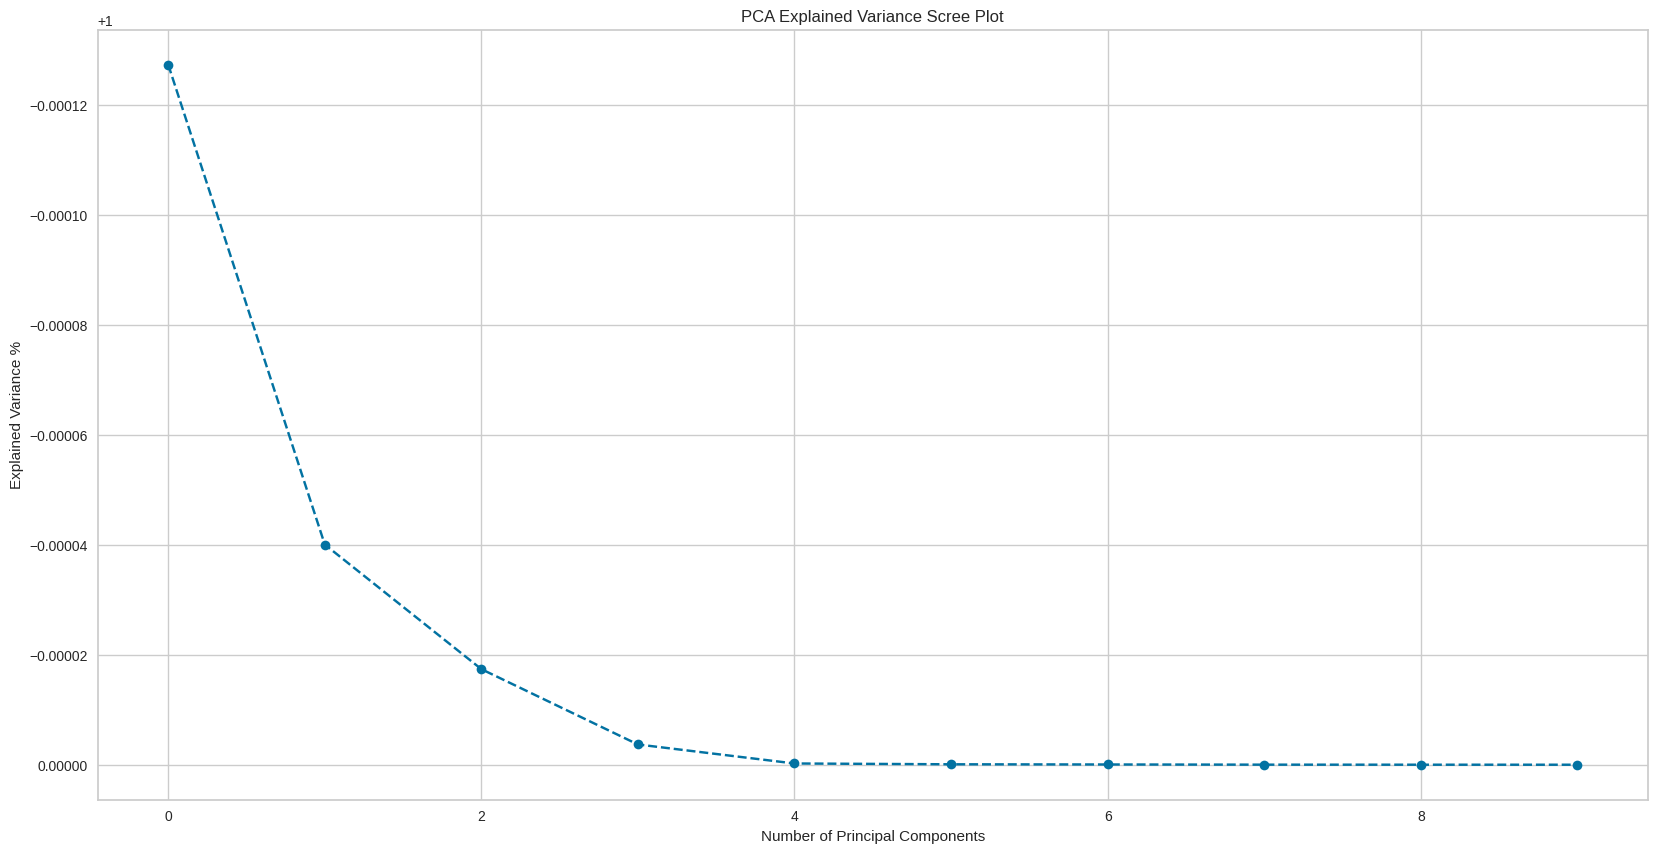

In [78]:
# PCA Explained Variance Scree Plot
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_std)

pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '--bo')
plt.gca().invert_yaxis()
plt.title('PCA Explained Variance Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance %')
plt.show()


In [ ]:
# Pareto chart of explained variance

pca = PCA(0.99)
x_pca = pca.fit_transform(x_std)
explained_varainces = pca.explained_variance_ratio_

# Compute the cumulative explained variance
print(explained_varainces)
cumulative_variances = np.cumsum(explained_varainces)

# Create the bar plot for individual variances
plt.figure(figsize=(12, 7))
bar = plt.bar(range(1, 11), explained_varainces, alpha=0.6, color='b', label='Individual Explained Variance')

# Create the line plot for cumulative variance
line = plt.plot(range(1, 11), cumulative_variances, marker='o', linestyle='-', color='r', 
                label='Cumulative Explained Variance')

# Adding percentage values on top of bars and dots
for i, (bar, cum_val) in enumerate(zip(bar, cumulative_variances)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{explained_varainces[i]*100:.1f}%', 
             ha='center', va='bottom')
    plt.text(i+1, cum_val, f'{cum_val*100:.1f}%', ha='center', va='bottom')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.xticks(range(1, 11))
plt.legend(loc='upper left')
plt.ylim(0, 1.1) 
plt.grid(True)
plt.show()

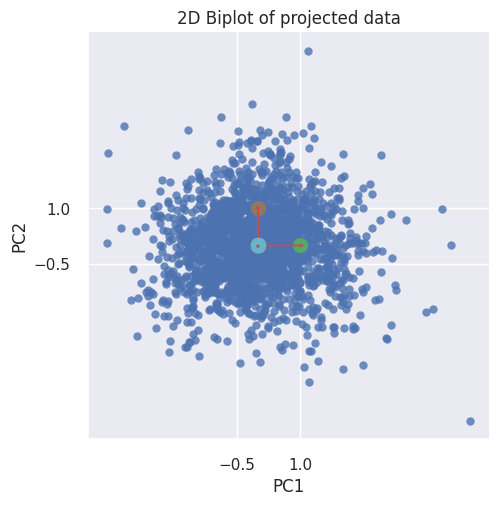

In [79]:
# Project original data to new axis
#Get the loadings of x and y axes
sns.set()
pca_df = pd.DataFrame(
    data=x_pca, 
    columns=['PC1', 'PC2']
)
pca_df_scaled = pca_df.copy()
features = list(data)
loadings = pca.components_
xs = loadings[0]
ys = loadings[1]

sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False, 
)


# Plot the loadings on a scatterplot
for i, varnames in enumerate(features):
    plt.scatter(xs[i], ys[i], s=100)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.06,
        head_length=0.06, 
        )
    # plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.5, 1, num=2)
yticks = np.linspace(-0.5, 1, num=2)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Biplot of projected data')
plt.show()

In [30]:
# Machine learning

# Review Of Dataset Features
data.describe().T


,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.085990,1.573337,0.227499,6.089723,7.027297,8.052969,14.000000
Hardness,2011.0,195.968072,32.635085,73.492234,176.744938,197.191839,216.441070,317.338124
Solids,2011.0,21917.441374,8642.239815,320.942611,15615.665390,20933.512750,27182.587067,56488.672413
Chloramines,2011.0,7.134338,1.584820,1.390871,6.138895,7.143907,8.109726,13.127000
Sulfate,2011.0,333.224672,41.205172,129.000000,307.632511,332.232177,359.330555,481.030642
Conductivity,2011.0,426.526409,80.712572,201.619737,366.680307,423.455906,482.373169,753.342620
Organic_carbon,2011.0,14.357709,3.324959,2.200000,12.124105,14.322019,16.683049,27.006707
Trihalomethanes,2011.0,66.400859,16.077109,8.577013,55.952664,66.542198,77.291925,124.000000
Turbidity,2011.0,3.969729,0.780346,1.450000,3.442915,3.968177,4.514175,6.494749
Potability,2011.0,0.403282,0.490678,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Visualize dataset
def visualize_data():
    # Plot heat map of original data
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot= True, cmap='coolwarm')  #terrain
    plt.show()


    # Pair plot
    plt.figure(figsize=(10, 8))
    sns.pairplot(data, hue="Potability")
    plt.show()
visualize_data()



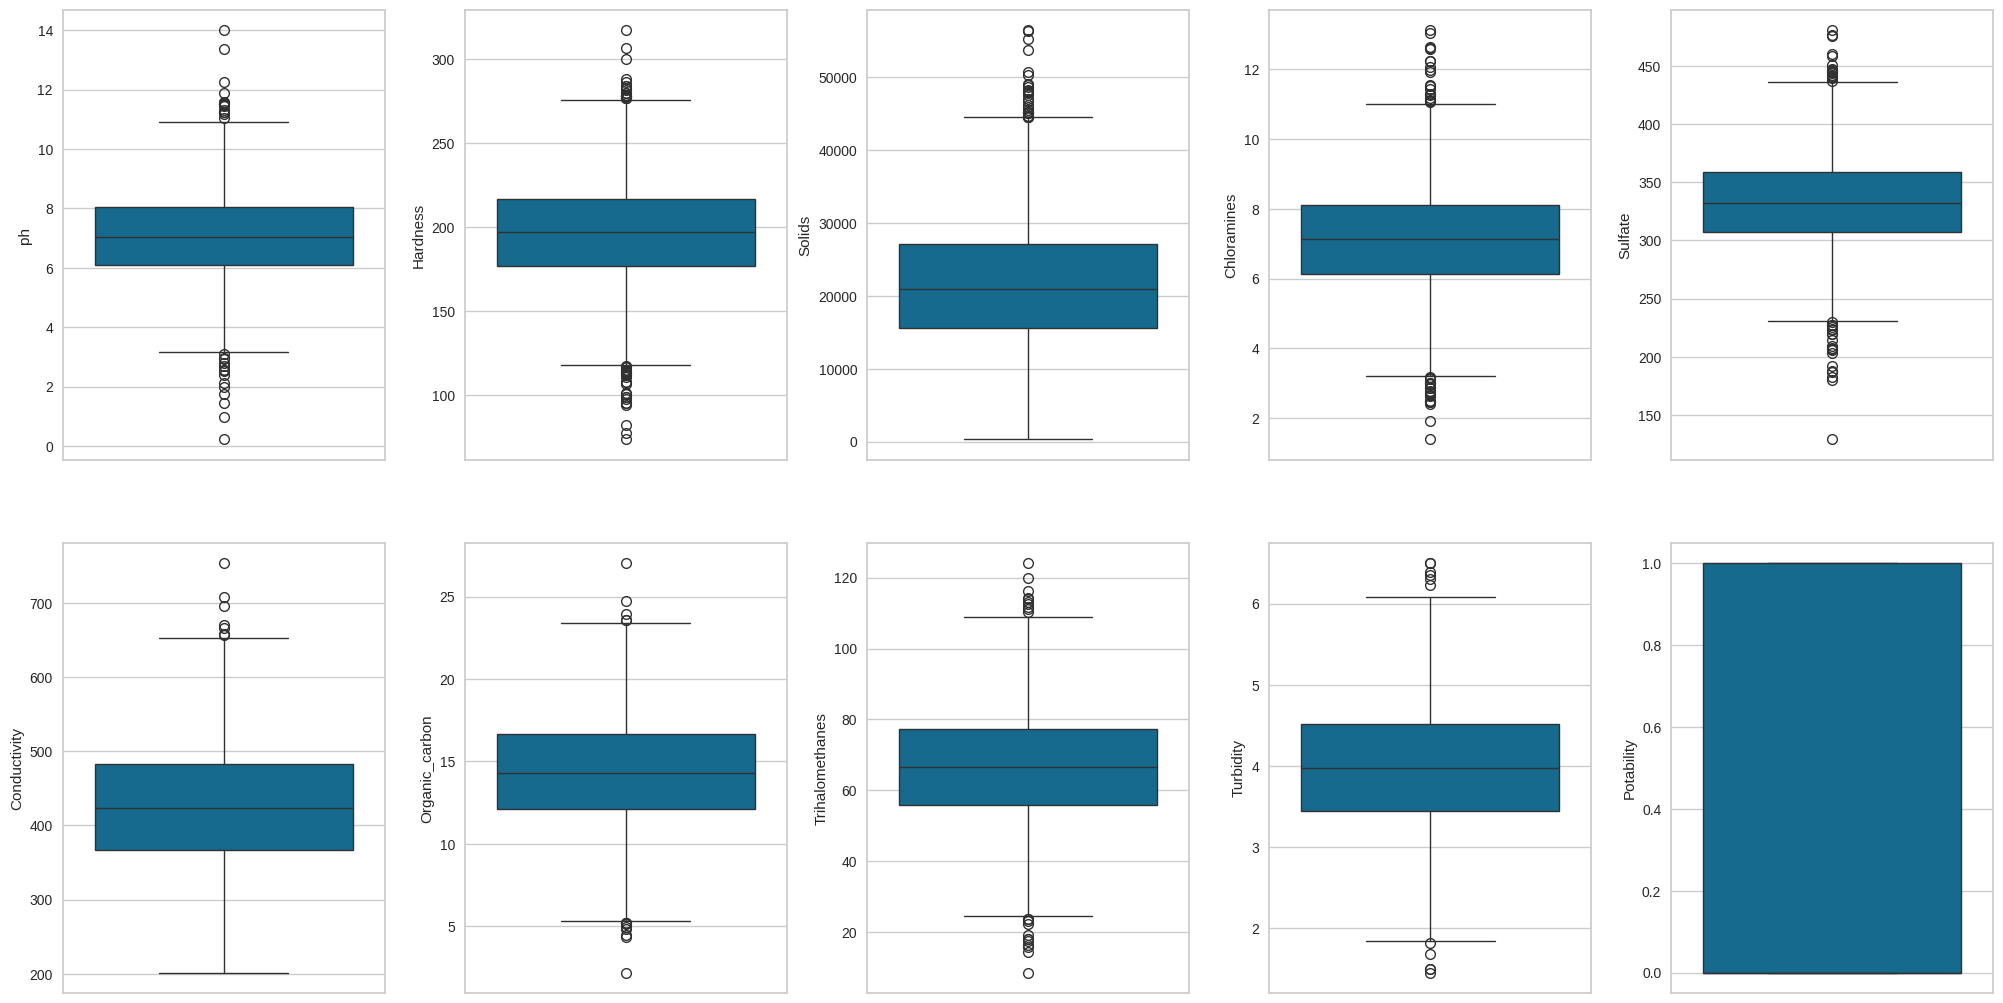

In [31]:
# Checking for outliers (box plot)
df = data
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

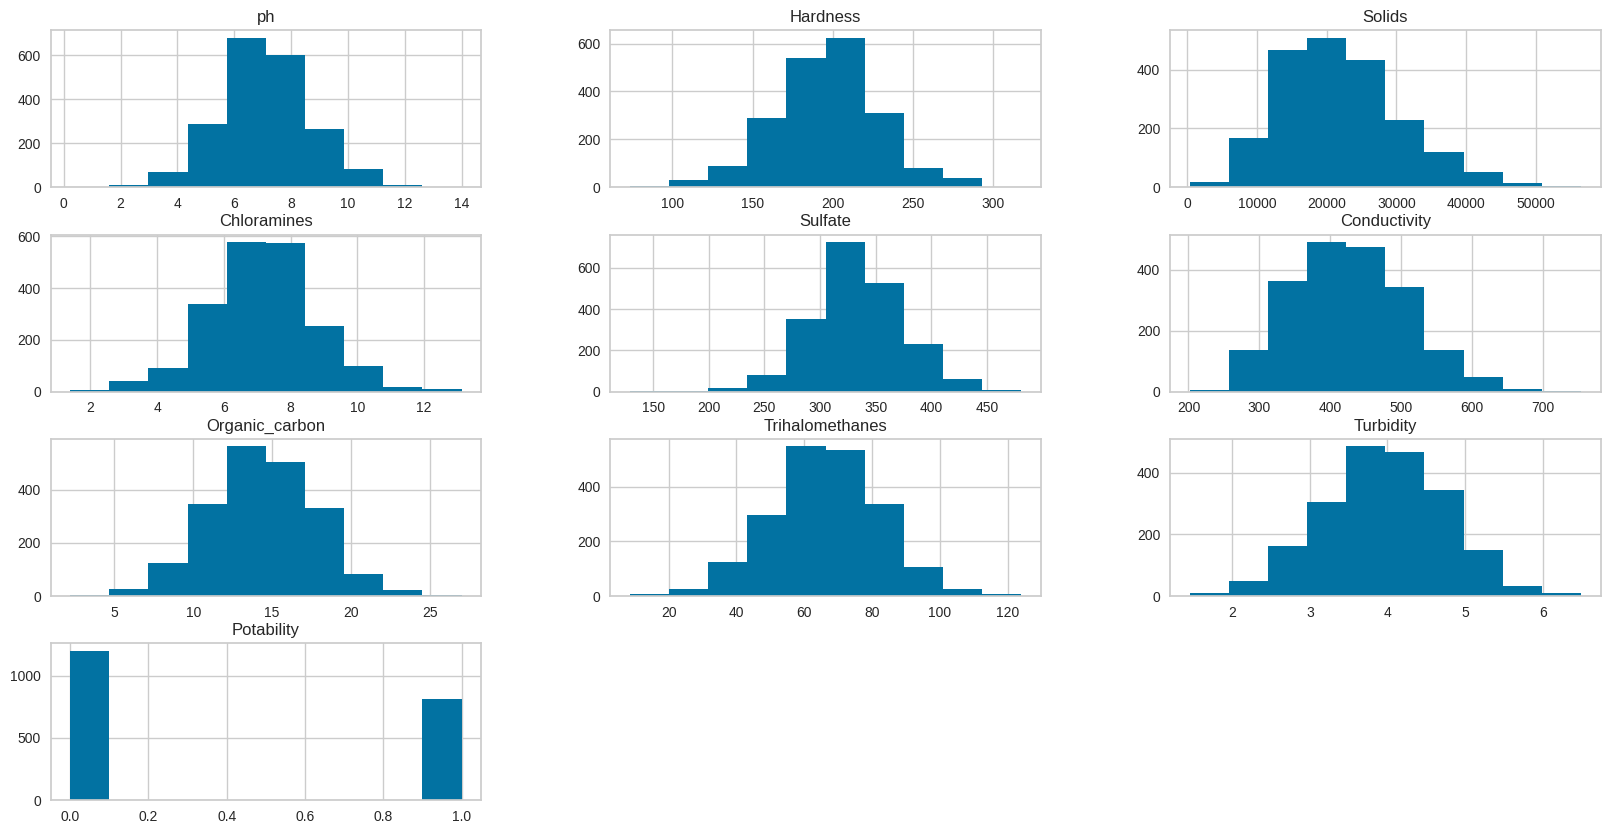

In [32]:
# Checking for outliers (Histogram)
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

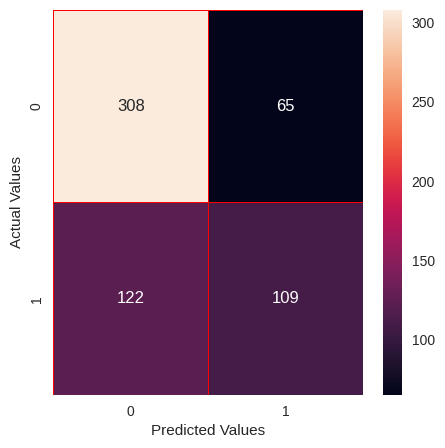

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       373
           1       0.63      0.47      0.54       231

    accuracy                           0.69       604
   macro avg       0.67      0.65      0.65       604
weighted avg       0.68      0.69      0.68       604



In [76]:
# Selecting a Model
X = df.drop("Potability", axis=1).values
y = df["Potability"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Acurracy of Random Forest Algorithm
classifier_RF = RandomForestClassifier()
classifier_RF = classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)
Accuracy_RF = accuracy_score(y_test,y_pred_RF)
# print("Model Accuracy of Random Forest Algorithm:",Accuracy_RF)


# Confusion Matrix for Random Forest Algorithm
result = confusion_matrix(y_test, y_pred_RF)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(result,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# Classification Report for Random Forest Algorithm
classification_rpt = classification_report(y_test, y_pred_RF)
print("Classification Report:",)
print (classification_rpt)


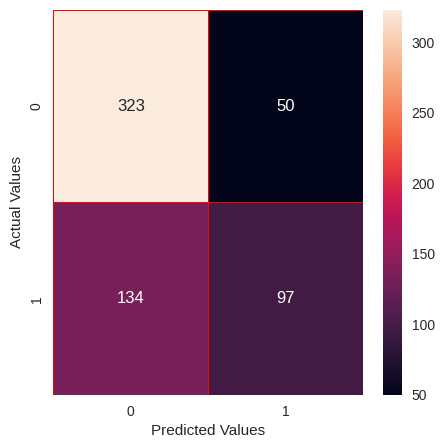

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       373
           1       0.66      0.42      0.51       231

    accuracy                           0.70       604
   macro avg       0.68      0.64      0.65       604
weighted avg       0.69      0.70      0.68       604



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Acurracy of Quadratic Discriminant Analysis
classifier_QDA = QuadraticDiscriminantAnalysis()
classifier_QDA = classifier_QDA.fit(X_train, y_train)
y_pred_QDA = classifier_QDA.predict(X_test)
Accuracy_QDA = accuracy_score(y_test,y_pred_QDA)
# print("Model Accuracy of Random Forest Algorithm:",Accuracy_QDA)


# Confusion Quadratic Discriminant Analysis
result = confusion_matrix(y_test, y_pred_QDA)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(result,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# Classification Report for Quadratic Discriminant Analysis
classification_rpt = classification_report(y_test, y_pred_QDA)
print("Classification Report:",)
print (classification_rpt)


In [80]:
# Compare models

# clf = setup(data, target = "Potability", session_id = 786)
# compare_models()

model = create_model("rf")
predict = predict_model(model, data=data)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6596,0.6720,0.3684,0.6364,0.4667,0.2419,0.2614
1,0.6809,0.7256,0.3684,0.7000,0.4828,0.2828,0.3133
2,0.7163,0.6705,0.4211,0.7742,0.5455,0.3644,0.4002
3,0.7021,0.6919,0.4386,0.7143,0.5435,0.3407,0.3630
4,0.6383,0.6312,0.4035,0.5750,0.4742,0.2113,0.2190
5,0.6454,0.6917,0.3509,0.6061,0.4444,0.2103,0.2273
6,0.7092,0.7448,0.4035,0.7667,0.5287,0.3466,0.3839
7,0.6500,0.6197,0.3750,0.6000,0.4615,0.2222,0.2357
8,0.7000,0.7027,0.5000,0.6667,0.5714,0.3478,0.3563


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8951,0.9681,0.8089,0.9213,0.8615,0.7776,0.7819


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,0.84
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,0.94
5,5.584086,188.313324,28748.687500,7.544869,326.678375,280.467926,8.399734,54.917862,2.559708,0,0,0.85
6,10.223862,248.071732,28749.716797,7.513409,393.663391,283.651642,13.789696,84.603554,2.672989,0,0,0.67
7,8.635849,203.361526,13672.091797,4.563009,303.309784,474.607635,12.363816,62.798309,4.401425,0,0,0.95
